In [1]:
import os
import pandas as pd
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import seaborn as sns
from sklearn.ensemble import *
from catboost import CatBoostClassifier
import numpy as np
import itertools
from sklearn.linear_model import LogisticRegression

In [2]:
os.chdir('..')

In [3]:
pd.set_option('display.max_columns', None)

In [47]:
df=pd.read_csv('artifacts/data_transformation/train.csv')

In [48]:
df = df.loc[:, ~df.columns.str.startswith('NATURE')]

In [49]:
int_cols=df.loc[:,df.columns.str.startswith('ST_GENERAL')].columns.to_list()+(df.loc[:,df.columns.str.startswith('PRODUCT')].columns.to_list())+ (df.loc[:,df.columns.str.startswith('GENDER')].columns.to_list())
int_cols+=['AGE','A_SCORE_VALUE']

for col in int_cols:
    df[col]=df[col].astype(int)
    

In [50]:
df.head()

,ACC_NO,MIN_DUE_AMT_1,MIN_DUE_AMT_2,MIN_DUE_AMT_3,MIN_DUE_AMT_4,MIN_DUE_AMT_5,MIN_DUE_AMT_6,OVER_LIMIT_FEE_1,OVER_LIMIT_FEE_2,OVER_LIMIT_FEE_3,OVER_LIMIT_FEE_4,OVER_LIMIT_FEE_5,OVER_LIMIT_FEE_6,TOT_SPEND_AMT_1,TOT_SPEND_AMT_2,TOT_SPEND_AMT_3,TOT_SPEND_AMT_4,TOT_SPEND_AMT_5,TOT_SPEND_AMT_6,PAYMENT_AMT_1,PAYMENT_AMT_2,PAYMENT_AMT_3,PAYMENT_AMT_4,PAYMENT_AMT_5,PAYMENT_AMT_6,TOTAL_OS_1,TOTAL_OS_2,TOTAL_OS_3,TOTAL_OS_4,TOTAL_OS_5,TOTAL_OS_6,LATE_PAY_FEE_1,LATE_PAY_FEE_2,LATE_PAY_FEE_3,LATE_PAY_FEE_4,LATE_PAY_FEE_5,LATE_PAY_FEE_6,A_SCORE_VALUE,FINAL_LIMIT,3_MONTH_NPL_STATUS,AGE,MONTH_END_BAL_LCY,REV_SETT_1_REVOLVER,REV_SETT_1_SETTLER,REV_SETT_2_REVOLVER,REV_SETT_2_SETTLER,REV_SETT_3_REVOLVER,REV_SETT_3_SETTLER,REV_SETT_4_REVOLVER,REV_SETT_4_SETTLER,REV_SETT_5_REVOLVER,REV_SETT_5_SETTLER,REV_SETT_6_REVOLVER,REV_SETT_6_SETTLER,RESTRUCTURED_PLAN_N,RESTRUCTURED_PLAN_Y,ST_GENERAL_ACC_BLCK,ST_GENERAL_ACC_CLST,ST_GENERAL_ACC_DACL,ST_GENERAL_ACC_DCBK,ST_GENERAL_ACC_DLNQ,ST_GENERAL_ACC_DRSP,ST_GENERAL_ACC_NORM,ST_GENERAL_ACC_PCLS,ST_GENERAL_ACC_RCDF,ST_GENERAL_ACC_RCLS,ST_GENERAL_ACC_RCPM,ST_GENERAL_ACC_RCSM,ST_GENERAL_ACC_RCSS,ST_GENERAL_ACC_RSET,ST_GENERAL_ACC_SACC,ST_GENERAL_ACC_SETT,ST_GENERAL_ACC_TERM,ST_GENERAL_ACC_WROF,GENDER_F,GENDER_M,PRODUCT_P13635,PRODUCT_P2f44d,PRODUCT_P3c2a4,PRODUCT_P3dbc4,PRODUCT_P59e14,PRODUCT_P78a55,PRODUCT_P7fc9a,PRODUCT_P8f4b3,PRODUCT_Pacee4,PRODUCT_Pd9c22,PRODUCT_Pdbb26,PRODUCT_Pdc921,PRODUCT_Pf4d80
0,93944.0,542.70,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,12896.00,78185.72,16409.23,9008.00,0.00,0.00,3000.0,0.0,42000.0,3000.0,1000.0,2000.0,137387.06,125209.110,46277.59,65720.36,59712.36,60712.36,1750.0,0.0,0.0,0.0,0.0,0.0,194,317000.0,0.0,56,397.13,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,7238.0,7798.39,4076.19,2045.47,1551.43,7527.77,887.62,0.0,0.0,0.0,0.0,0.0,0.0,79873.03,67408.22,165612.27,87593.55,42954.06,179232.44,195000.0,51500.0,52000.0,39000.0,188200.0,22500.0,140000.80,255127.770,232021.77,117428.98,68785.43,213981.38,0.0,0.0,1750.0,0.0,0.0,0.0,217,1000000.0,0.0,35,0.00,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,11226.0,0.00,0.00,0.00,0.00,0.00,250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,-76.31,-76.310,-76.31,-76.31,-76.31,-76.31,0.0,0.0,0.0,0.0,0.0,0.0,231,1037000.0,0.0,55,0.00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,94712.0,818.80,650.04,579.68,830.91,577.58,636.81,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1739.70,0.00,0.00,6314.00,13000.0,20500.0,16300.0,14500.0,20800.0,14500.0,97219.38,110219.375,130469.38,139029.67,153529.69,174329.67,0.0,0.0,0.0,0.0,0.0,0.0,233,500000.0,0.0,37,0.00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,119466.0,570.24,618.13,602.91,250.00,250.00,250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,42779.00,8278.68,17041.09,2238.00,0.00,15000.0,15500.0,16200.0,5500.0,3500.0,3500.0,97667.70,112667.700,85388.70,93310.02,81768.93,83030.93,0.0,0.0,0.0,0.0,0.0,1750.0,201,376000.0,0.0,56,0.00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [67]:
df_1=df.copy()

In [52]:
df_1['OVER_LIMIT_FEE_1']=(df_1['OVER_LIMIT_FEE_1']>=1750).astype(int)
df_1['OVER_LIMIT_FEE_2']=(df_1['OVER_LIMIT_FEE_2']>=1750).astype(int)
df_1['OVER_LIMIT_FEE_3']=(df_1['OVER_LIMIT_FEE_3']>=1750).astype(int)
df_1['OVER_LIMIT_FEE_4']=(df_1['OVER_LIMIT_FEE_4']>=1750).astype(int)
df_1['OVER_LIMIT_FEE_5']=(df_1['OVER_LIMIT_FEE_5']>=1750).astype(int)
df_1['OVER_LIMIT_FEE_6']=(df_1['OVER_LIMIT_FEE_6']>=1750).astype(int)

df_1['LATE_PAY_FEE_1']=(df_1['LATE_PAY_FEE_1']>=1750).astype(int)
df_1['LATE_PAY_FEE_2']=(df_1['LATE_PAY_FEE_2']>=1750).astype(int)
df_1['LATE_PAY_FEE_3']=(df_1['LATE_PAY_FEE_3']>=1750).astype(int)
df_1['LATE_PAY_FEE_4']=(df_1['LATE_PAY_FEE_4']>=1750).astype(int)
df_1['LATE_PAY_FEE_5']=(df_1['LATE_PAY_FEE_5']>=1750).astype(int)
df_1['LATE_PAY_FEE_6']=(df_1['LATE_PAY_FEE_6']>=1750).astype(int)

In [68]:
df_1['REV_SETT_1'] = df_1['REV_SETT_1_REVOLVER'].apply(lambda x: 1 if x == 1 else 0)
df_1['REV_SETT_2'] = df_1['REV_SETT_2_REVOLVER'].apply(lambda x: 1 if x == 1 else 0)
df_1['REV_SETT_3'] = df_1['REV_SETT_3_REVOLVER'].apply(lambda x: 1 if x == 1 else 0)
df_1['REV_SETT_4'] = df_1['REV_SETT_4_REVOLVER'].apply(lambda x: 1 if x == 1 else 0)
df_1['REV_SETT_5'] = df_1['REV_SETT_5_REVOLVER'].apply(lambda x: 1 if x == 1 else 0)
df_1['REV_SETT_6'] = df_1['REV_SETT_6_REVOLVER'].apply(lambda x: 1 if x == 1 else 0)

df_1=df_1.drop(columns=['REV_SETT_1_REVOLVER','REV_SETT_2_REVOLVER','REV_SETT_3_REVOLVER','REV_SETT_4_REVOLVER','REV_SETT_5_REVOLVER','REV_SETT_6_REVOLVER',
                        'REV_SETT_1_SETTLER','REV_SETT_2_SETTLER','REV_SETT_3_SETTLER','REV_SETT_4_SETTLER','REV_SETT_5_SETTLER','REV_SETT_6_SETTLER'])

In [54]:
df_1['LATE_PAY_FEE']=df_1['LATE_PAY_FEE_1']+df_1['LATE_PAY_FEE_2']+df_1['LATE_PAY_FEE_3']+df_1['LATE_PAY_FEE_4']+df_1['LATE_PAY_FEE_5']+df_1['LATE_PAY_FEE_6']


df_1['OVER_LIMIT_FEE']=df_1['OVER_LIMIT_FEE_1']+df_1['OVER_LIMIT_FEE_2']+df_1['OVER_LIMIT_FEE_3']+df_1['OVER_LIMIT_FEE_4']+df_1['OVER_LIMIT_FEE_5']+df_1['OVER_LIMIT_FEE_6']

In [55]:
df_1=df_1.drop(columns=['LATE_PAY_FEE_1','LATE_PAY_FEE_2','LATE_PAY_FEE_3','LATE_PAY_FEE_4','LATE_PAY_FEE_5','LATE_PAY_FEE_6'])

df_1=df_1.drop(columns=['OVER_LIMIT_FEE_1','OVER_LIMIT_FEE_2','OVER_LIMIT_FEE_3','OVER_LIMIT_FEE_4','OVER_LIMIT_FEE_5','OVER_LIMIT_FEE_6'])

In [69]:
df_2=df_1.copy()

df_2=df_2.drop(columns=['A_SCORE_VALUE'])

In [70]:
df_3=df_2.copy()

df_3['TOTAL_OS']=(df_3['TOTAL_OS_1']+df_3['TOTAL_OS_2']+df_3['TOTAL_OS_3']+df_3['TOTAL_OS_4']+df_3['TOTAL_OS_5']+df_3['TOTAL_OS_6'])/6

df_3=df_3.drop(columns=['TOTAL_OS_1','TOTAL_OS_2','TOTAL_OS_3','TOTAL_OS_4','TOTAL_OS_5','TOTAL_OS_6','PRODUCT_Pdbb26'])

In [71]:
df1=df_3.drop(columns=['ACC_NO'])

In [72]:
x=df1.drop(columns=['3_MONTH_NPL_STATUS'])
y=df1.loc[:,['3_MONTH_NPL_STATUS']]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify=y,shuffle=True)

In [74]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_pred = model.predict(X_train)
    print('----------------------------------------------\n')
    
    print('Train F1: {:.2f}%'.format(f1_score(y_train, train_pred) * 100))
    print('Train Precision (Class 1): {:.2f}%'.format(precision_score(y_train, train_pred) * 100))
    print('Train Recall (Class 0): {:.2f}%'.format(recall_score(y_train, train_pred,pos_label=0) * 100))
    print('Train Recall: {:.2f}%'.format(recall_score(y_train, train_pred) * 100))
    
    print('----------------------------------------------\n')
    
    conf_matrix_xgb = confusion_matrix(y_train,train_pred)
    plt.figure(figsize=(2, 2))
    sns.heatmap(conf_matrix_xgb, annot=True, cmap='Blues', fmt='d', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    
    print('\n----------------------------------------------\n')
    test_pred = model.predict(X_test)

    
    print('Test F1: {:.2f}%'.format(f1_score(y_test, test_pred) * 100))
    print('Test Precision (Class 1): {:.2f}%'.format(precision_score(y_test, test_pred) * 100))
    print('Test Recall (Class 0): {:.2f}%'.format(recall_score(y_test, test_pred,pos_label=0) * 100))
    print('Test Recall: {:.2f}%'.format(recall_score(y_test, test_pred) * 100))
    
    print('----------------------------------------------\n')
    
    
    conf_matrix_xgb = confusion_matrix(y_test,test_pred)
    plt.figure(figsize=(2, 2))
    sns.heatmap(conf_matrix_xgb, annot=True, cmap='Blues', fmt='d', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [75]:
params_xgb = {
    'scale_pos_weight': 270,
    'max_depth': 5,
    'min_child_weight': 17,
    'subsample': 0.65,
    'colsample_bytree': 0.9,
    'objective':'binary:logistic',
    'eta':0.05,
    'gamma':0.01,
    'enable_categorical': True,
    'n_estimators': 1000,
    'seed': 42,
    'alpha':0.01,
    'eval_metric':'auc'
}

params_lgb = {
    'boosting_type': 'dart',
    'objective': 'binary',
    'scale_pos_weight': 150,
    'learning_rate': 0.05,
    'min_child_weight': 15,
    'num_leaves':75,
    'max_depth':10,
    'subsample':0.5,
    'colsample_bytree':0.9,
    'verbosity': -1,
    'n_estimators': 1000,
    'seed': 42
}

In [76]:
clf_xgb = XGBClassifier(**params_xgb)
clf_xgb.fit(X_train,y_train)


XGBClassifier(alpha=0.01, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=True, eta=0.05, eval_metric='auc',
              feature_types=None, gamma=0.01, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=17, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, ...)

----------------------------------------------

Train F1: 80.37%
Train Precision (Class 1): 67.18%
Train Recall (Class 0): 99.78%
Train Recall: 100.00%
----------------------------------------------



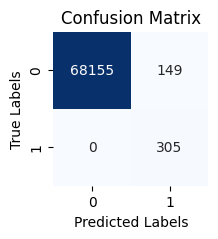


----------------------------------------------

Test F1: 17.63%
Test Precision (Class 1): 14.65%
Test Recall (Class 0): 99.42%
Test Recall: 22.14%
----------------------------------------------



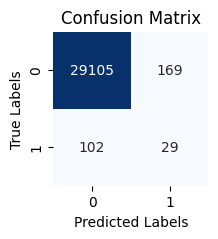

In [64]:
evaluate_model(clf_xgb, X_train, y_train, X_test, y_test)

In [65]:
clf_lgb = LGBMClassifier(**params_lgb)
clf_lgb.fit(X_train,y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


LGBMClassifier(boosting_type='dart', colsample_bytree=0.9, learning_rate=0.05,
               max_depth=10, min_child_weight=15, n_estimators=1000,
               num_leaves=75, objective='binary', scale_pos_weight=150, seed=42,
               subsample=0.5, verbosity=-1)

----------------------------------------------

Train F1: 87.39%
Train Precision (Class 1): 77.61%
Train Recall (Class 0): 99.87%
Train Recall: 100.00%
----------------------------------------------



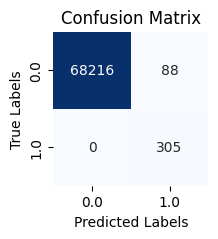


----------------------------------------------

Test F1: 20.71%
Test Precision (Class 1): 19.46%
Test Recall (Class 0): 99.59%
Test Recall: 22.14%
----------------------------------------------



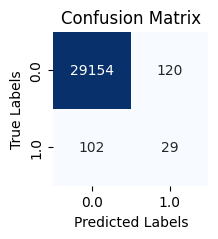

In [66]:
evaluate_model(clf_lgb, X_train, y_train, X_test, y_test)

In [24]:
estimators = [
    ('xgb', clf_xgb),
    ('lgb', clf_lgb),
]

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


----------------------------------------------

Train F1: 99.67%
Train Precision (Class 1): 99.35%
Train Recall (Class 0): 100.00%
Train Recall: 100.00%
----------------------------------------------



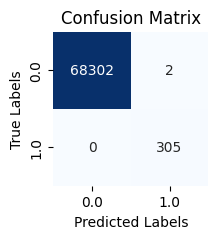


----------------------------------------------

Test F1: 17.45%
Test Precision (Class 1): 72.22%
Test Recall (Class 0): 99.98%
Test Recall: 9.92%
----------------------------------------------



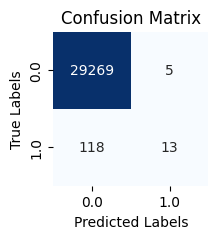

In [31]:
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
evaluate_model(stack, X_train, y_train, X_test, y_test)

In [32]:
pred_prob=stack.predict_proba(X_test)

In [41]:
pred_ta=(pred_prob[:,1]>=0.1).astype(int)

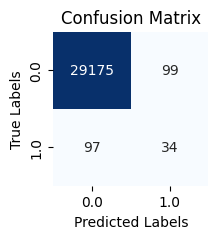

In [42]:
conf_matrix_xgb = confusion_matrix(y_test,pred_ta)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_xgb, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=stack.classes_, yticklabels=stack.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [43]:
bagging_classifier = BaggingClassifier(clf_lgb, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=LGBMClassifier(boosting_type='dart',
                                           colsample_bytree=0.9,
                                           learning_rate=0.05, max_depth=10,
                                           min_child_weight=15,
                                           n_estimators=1000, num_leaves=75,
                                           objective='binary',
                                           scale_pos_weight=150, seed=42,
                                           subsample=0.5, verbosity=-1),
                  random_state=42)

----------------------------------------------

Train F1: 89.51%
Train Precision (Class 1): 89.51%
Train Recall (Class 0): 99.95%
Train Recall: 89.51%
----------------------------------------------



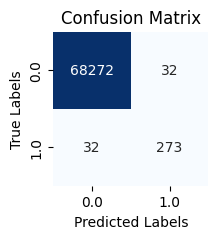


----------------------------------------------

Test F1: 21.16%
Test Precision (Class 1): 34.48%
Test Recall (Class 0): 99.87%
Test Recall: 15.27%
----------------------------------------------



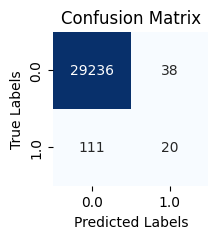

In [44]:
evaluate_model(bagging_classifier, X_train, y_train, X_test, y_test)

In [45]:
bagging_classifier = BaggingClassifier(clf_xgb, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=XGBClassifier(alpha=0.01, base_score=None,
                                          booster=None, callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.9, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=True, eta=0.05,
                                          eval_metric='auc', feature_types=None,
                                          gamma=0.01, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=5,
                                          max_leaves=None, min_child_weight=17,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=1000, n_jobs=None, ...),
                  random_state=42)

----------------------------------------------

Train F1: 87.10%
Train Precision (Class 1): 85.71%
Train Recall (Class 0): 99.93%
Train Recall: 88.52%
----------------------------------------------



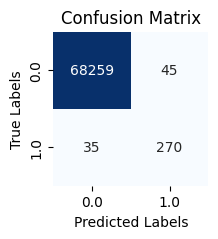


----------------------------------------------

Test F1: 20.00%
Test Precision (Class 1): 28.99%
Test Recall (Class 0): 99.83%
Test Recall: 15.27%
----------------------------------------------



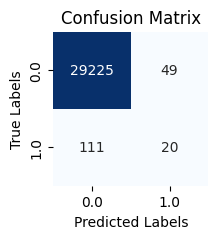

In [46]:
evaluate_model(bagging_classifier, X_train, y_train, X_test, y_test)